<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/05_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#분류 (Classification)

트레이닝 데이터 특성과 관계 등을 팍악 한후에, 미지의 입력 데이터에 대해서 경과가 어떤 종류의 값으로 분류 될 수 있는지를 예측하는 것

ex) 스팸 문자 분류, 암판별

입력 (x,t) >>> Regression >>>>classification >>>True/False

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

#CEE (Cross Entropy Error)


$$ p(C=t|x)=y^t(1-y)^{1-t}$$

확률 변수 C는 0이나 1 밖에는 값을 가질 수 없으므로, (즉, 정답 t=0 or 1) 위와 같이 나타남


$$ L(W,b)= \prod_{i=1}^N p(C=t_i|xi)=\prod_{i=1}^N{y_i}^{t_i}(1-y_i)^{1-t_i} $$



$$ E(W,b)= -logL(W,b)=-\sum_{i=1}^n ({t_ilogy_i+(1-t_i)log(1-y_i)}) $$

#영상 보기전 혼자 짜본 코드

키가 180 이상이면 타는 놀이기구를 생각하고 만들어보았습니다

하지만 결과 값이 예상과 다르게 나와 고민했습니다. 

결과적으론 180이라는 숫자가 매우 커서 분석할 때 잘 돌아가지 않는 모습을 볼 수 있었습니다. 

그래서 표본에서 -180을 하여 0(180)을 기준으로 1과 0이 나오게 하여 실행하였습니다.

[[0.491051]] [0.22174887]


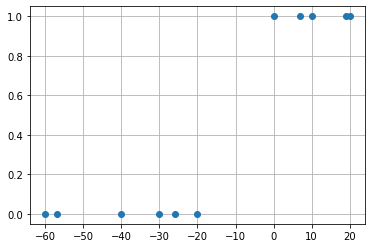

[[-20.]
 [-40.]
 [ 10.]
 [  0.]
 [-60.]
 [  7.]
 [-26.]
 [-57.]
 [-30.]
 [ 19.]
 [ 20.]]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [150]:
x_train=np.array([[160.,140.,190.,180.,120.,187.,154.,123.,150.,199.,200.]])-180
x_train=x_train.reshape(x_train.shape[1],1)
t_train=np.array([0,0,1,1,0,1,0,0,0,1,1]).reshape(x_train.shape[0],1)


W=np.random.rand(1,1)
b=np.random.rand(1)
print(W,b)

plt.plot(x_train,t_train,'o')
plt.grid()
plt.show()

print(x_train)
print(t_train)

In [151]:

def numerical_derivative(f,x):
  delta1=1e-4
  grads=np.zeros_like(x)
  it=np.nditer(x,flags=['multi_index'],op_flags=['readwrite'])

  while not it.finished:
    idx=it.multi_index
    tmp_value=x[idx]
    x[idx]=float(tmp_value)+delta1
    fx1=f(x)

    x[idx]=float(tmp_value)-delta1
    fx2=f(x)

    grads[idx]=(fx1-fx2)/(2*delta1)

    x[idx]=tmp_value
    it.iternext()

  return grads

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sorftmax(x):
  c=np.max(x)
  x=x-c
  return np.exp(x)/(np.sum(np.exp(x)))

def predict(x):
  a1=np.dot(x,W)+b
  y=sigmoid(a1)
  # z1=sigmoid(a1)
  # y=sorftmax(z1)
  if y>0.5:
    result=1
  else:
    result=0
  return y ,result

def error_value(x,t):
  delta=1e-6
  a1=np.dot(x,W)+b
  y=sigmoid(a1)
  # z1=sigmoid(a1)
  # y=sorftmax(z1)
  return np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))

def cee(x,t):
  delta=1e-6
  a1=np.dot(x,W)+b
  y=sigmoid(a1)
  # z1=sigmoid(a1)
  # y=sorftmax(z1)

  return -np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))

trainning_late=1e-4
fx= lambda x : cee(x_train,t_train)

for step in range(1000):
  W-= trainning_late*numerical_derivative(fx,W)
  b-= trainning_late*numerical_derivative(fx,b)
  if step%100==0:
    print('step:',step,'error value:',error_value(x_train,t_train),'\n','W:',W,'b:',b)

print('190:',predict(190-180))
print('180:',predict(180-180))
print('179:',predict(179-180))
print('170:',predict(170-180))
print('160:',predict(160-180))
print('150:',predict(150-180))

step: 0 error value: -0.6198683385639916 
 W: [[0.49107481]] b: [0.22179645]
step: 100 error value: -0.617059370382195 
 W: [[0.49342866]] b: [0.22654509]
step: 200 error value: -0.6142924087756639 
 W: [[0.49572963]] b: [0.23127538]
step: 300 error value: -0.6115655612759153 
 W: [[0.4979799]] b: [0.23598763]
step: 400 error value: -0.6088770763438257 
 W: [[0.50018148]] b: [0.24068214]
step: 500 error value: -0.6062253299627209 
 W: [[0.50233629]] b: [0.24535918]
step: 600 error value: -0.6036088137499589 
 W: [[0.50444613]] b: [0.25001904]
step: 700 error value: -0.6010261243888328 
 W: [[0.50651268]] b: [0.25466196]
step: 800 error value: -0.5984759542117747 
 W: [[0.50853756]] b: [0.25928819]
step: 900 error value: -0.5959570827902034 
 W: [[0.51052227]] b: [0.26389797]
190: (array([[0.995472]]), 1)
180: (array([[0.56671128]]), 1)
179: (array([[0.43930003]]), 0)
170: (array([[0.00772112]]), 0)
160: (array([[4.62901909e-05]]), 0)
150: (array([[2.75404644e-07]]), 0)


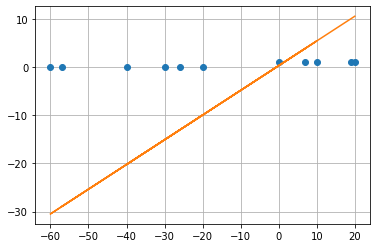

In [152]:
y=W*x_train+b

plt.plot(x_train,t_train,'o')
plt.plot(x_train,y)
plt.grid()
plt.show()

#다시 강의 내용

단일 인풋은 생략 후 멀티 인풋을 기준으로 시작

In [155]:
x_data=np.array([[2,4],[4,11],[6,6],[8,5],[10,7],[12,15],[14,8],[15,3],[18,7]])
t_data=np.array([0,0,0,0,1,1,1,1,1,]).reshape(9,1)


W1=np.random.rand(2,1)
b1=np.random.rand(1)
print(W1,b1)


[[0.97779924]
 [0.78666942]] [0.40110215]


In [163]:
def predict(x):
  a1=np.dot(x,W1)+b1
  y=sigmoid(a1)
  if y>0.5:
    result=1
  else:
    result=0
  return y ,result

def cee1(x,t):
  delta=1e-6
  a1=np.dot(x,W1)+b1
  y=sigmoid(a1)
  return -np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))

def error_value(x,t):
  delta=1e-6
  a1=np.dot(x,W1)+b1
  y=sigmoid(a1)

  return np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))


trainning_late=1e-4
fx= lambda x : cee1(x_data,t_data)

for step in range(1000):
  W1-= trainning_late*numerical_derivative(fx,W1)
  b1-= trainning_late*numerical_derivative(fx,b1)
  if step%100==0:
    print('step:',step,'error value:',error_value(x_data,t_data),'\n','W:',W1,'\n','b:',b1)

print('12,0:',predict(np.array([12,0])))
print('9,3:',predict(np.array([9,3])))
print('6,6:',predict(np.array([6,6])))
print('3,9:',predict(np.array([3,9])))

step: 0 error value: -3.8782186365237883 
 W: [[ 0.31176437]
 [-0.2319042 ]] 
 b: [-0.29652432]
step: 100 error value: -3.869753251714186 
 W: [[ 0.3122124 ]
 [-0.23137261]] 
 b: [-0.30569935]
step: 200 error value: -3.861324186815436 
 W: [[ 0.31265888]
 [-0.23084156]] 
 b: [-0.31485467]
step: 300 error value: -3.8529312597653784 
 W: [[ 0.31310392]
 [-0.23031115]] 
 b: [-0.32399034]
step: 400 error value: -3.844574289345642 
 W: [[ 0.31354765]
 [-0.22978151]] 
 b: [-0.33310641]
step: 500 error value: -3.83625309514771 
 W: [[ 0.31399015]
 [-0.22925273]] 
 b: [-0.34220295]
step: 600 error value: -3.8279674975468554 
 W: [[ 0.31443153]
 [-0.22872488]] 
 b: [-0.35128001]
step: 700 error value: -3.8197173176823305 
 W: [[ 0.31487186]
 [-0.22819805]] 
 b: [-0.36033764]
step: 800 error value: -3.8115023774424297 
 W: [[ 0.3153112]
 [-0.2276723]] 
 b: [-0.36937591]
step: 900 error value: -3.803322499453338 
 W: [[ 0.31574962]
 [-0.22714768]] 
 b: [-0.37839487]
12,0: (array([0.96791914]), 1)

위의 예제는 인덱스0은 예습 1은 복습으로
예습이 많아야 시험에 통과(1)가 되는 걸 확인 할 수 있었다.
그 이유는 W1이 W2보다 가중치 비중이 높게 나와서이다